In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
sentences = ['What I cannot create, I do not understand.',
             'Intellecuals solve problems, geniuses prevent them.',
             'A person who never made a mistake never tied anything new.',
             'The same equations have the same solutions.']
y_data = [1, 0, 0, 1]  # 1 for richard feynman, 0 for albert einstein

In [3]:
# preprocessing
char_set = ['<pad>'] + sorted(list(set(''.join(sentences))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', ',', '.', 'A', 'I', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']
{0: '<pad>', 1: ' ', 2: ',', 3: '.', 4: 'A', 5: 'I', 6: 'T', 7: 'W', 8: 'a', 9: 'b', 10: 'c', 11: 'd', 12: 'e', 13: 'g', 14: 'h', 15: 'i', 16: 'k', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'q', 23: 'r', 24: 's', 25: 't', 26: 'u', 27: 'v', 28: 'w', 29: 'y'}
{'<pad>': 0, ' ': 1, ',': 2, '.': 3, 'A': 4, 'I': 5, 'T': 6, 'W': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'g': 13, 'h': 14, 'i': 15, 'k': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'q': 22, 'r': 23, 's': 24, 't': 25, 'u': 26, 'v': 27, 'w': 28, 'y': 29}


In [4]:
x_data = list(map(lambda sentence : [char2idx.get(char) for char in sentence], sentences))
x_data_len = list(map(lambda sentence : len(sentence), sentences))

for sentence in x_data:
  print(sentence)
print(x_data_len)
print(y_data)

[7, 14, 8, 25, 1, 5, 1, 10, 8, 19, 19, 20, 25, 1, 10, 23, 12, 8, 25, 12, 2, 1, 5, 1, 11, 20, 1, 19, 20, 25, 1, 26, 19, 11, 12, 23, 24, 25, 8, 19, 11, 3]
[5, 19, 25, 12, 17, 17, 12, 10, 26, 8, 17, 24, 1, 24, 20, 17, 27, 12, 1, 21, 23, 20, 9, 17, 12, 18, 24, 2, 1, 13, 12, 19, 15, 26, 24, 12, 24, 1, 21, 23, 12, 27, 12, 19, 25, 1, 25, 14, 12, 18, 3]
[4, 1, 21, 12, 23, 24, 20, 19, 1, 28, 14, 20, 1, 19, 12, 27, 12, 23, 1, 18, 8, 11, 12, 1, 8, 1, 18, 15, 24, 25, 8, 16, 12, 1, 19, 12, 27, 12, 23, 1, 25, 15, 12, 11, 1, 8, 19, 29, 25, 14, 15, 19, 13, 1, 19, 12, 28, 3]
[6, 14, 12, 1, 24, 8, 18, 12, 1, 12, 22, 26, 8, 25, 15, 20, 19, 24, 1, 14, 8, 27, 12, 1, 25, 14, 12, 1, 24, 8, 18, 12, 1, 24, 20, 17, 26, 25, 15, 20, 19, 24, 3]
[42, 51, 58, 43]
[1, 0, 0, 1]


In [5]:
max_len = 60
x_data = pad_sequences(x_data, max_len, padding='post', truncating='post')
x_data_len = list(map(lambda sentence : len(sentence), sentences))

for sentence_preprocessed in x_data:
  print(sentence_preprocessed)
print(x_data_len)
print(y_data)

[ 7 14  8 25  1  5  1 10  8 19 19 20 25  1 10 23 12  8 25 12  2  1  5  1
 11 20  1 19 20 25  1 26 19 11 12 23 24 25  8 19 11  3  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
[ 5 19 25 12 17 17 12 10 26  8 17 24  1 24 20 17 27 12  1 21 23 20  9 17
 12 18 24  2  1 13 12 19 15 26 24 12 24  1 21 23 12 27 12 19 25  1 25 14
 12 18  3  0  0  0  0  0  0  0  0  0]
[ 4  1 21 12 23 24 20 19  1 28 14 20  1 19 12 27 12 23  1 18  8 11 12  1
  8  1 18 15 24 25  8 16 12  1 19 12 27 12 23  1 25 15 12 11  1  8 19 29
 25 14 15 19 13  1 19 12 28  3  0  0]
[ 6 14 12  1 24  8 18 12  1 12 22 26  8 25 15 20 19 24  1 14  8 27 12  1
 25 14 12  1 24  8 18 12  1 24 20 17 26 25 15 20 19 24  3  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
[42, 51, 58, 43]
[1, 0, 0, 1]


In [6]:
# creating stacked rnn for "many to one"
num_classes = 2
hidden_dims = [10, 10]

input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))

print("Input_dims: ", input_dim)
print("Output_dims: ", output_dim)

Input_dims:  30
Output_dims:  30


In [0]:
def create_model():
  model = keras.Sequential()
  model.add(layers.Embedding(input_dim = input_dim, output_dim = output_dim,
                             trainable=False, mask_zero=True, input_length=max_len,   # mask_zero=True => ignore 0 paddings
                             embeddings_initializer=keras.initializers.Constant(one_hot)))
  model.add(layers.SimpleRNN(units=hidden_dims[0], return_sequences=True))
  model.add(layers.TimeDistributed(layers.Dropout(rate = .2)))
  model.add(layers.SimpleRNN(units=hidden_dims[1]))
  model.add(layers.Dropout(rate = .2))
  model.add(layers.Dense(units=num_classes))
  
  return model

In [8]:
model = create_model()

W0626 13:34:51.116353 139871634225024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:3868: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 30)            900       
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 60, 10)            410       
_________________________________________________________________
time_distributed (TimeDistri (None, 60, 10)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 1,542
Trainable params: 642
Non-trainable params: 900
______________________________________________________

In [10]:
model.input_shape

(None, 60)

In [0]:
def loss_fn(model, x, y, training):
  loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=model(x, training))
  loss = tf.reduce_mean(loss, axis= -1)
  return loss

In [0]:
lr = 1e-2
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(lr)

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
dataset = dataset.shuffle(4)
dataset = dataset.batch(batch_size)

In [14]:
print(dataset)

<BatchDataset shapes: ((None, 60), (None,)), types: (tf.int32, tf.int32)>


In [17]:
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, training=True)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 ==0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss))

epoch :   5, tr_loss : 0.114
epoch :  10, tr_loss : 0.048
epoch :  15, tr_loss : 0.016
epoch :  20, tr_loss : 0.016
epoch :  25, tr_loss : 0.005
epoch :  30, tr_loss : 0.003


In [18]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('accuracy : {:.2%}'.format(np.mean(yhat == y_data)))

accuracy : 100.00%


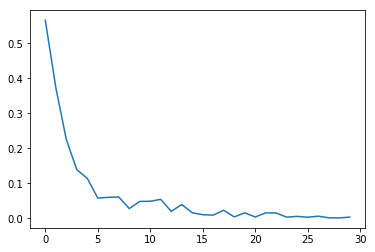

In [19]:
import matplotlib.pyplot as plt

plt.plot(tr_loss_hist)